In [1]:
from maelzel.core import *

end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance


Chain([4C:1♩, 4D:0.5♩, 4E:1♩:offset=3])
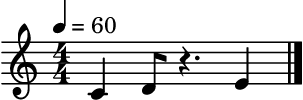

In [2]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3"
])
ch

In [3]:
assert all(item.parent is ch for item in ch.items)

In [4]:
ch.splitEventsAtOffsets([0.5])
ch.dump()

Chain([4C~:0.5♩, 4C:0.5♩:symbols=[NoMerge()], 4D:0.5♩, 4E:1♩:offset=3])
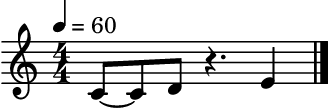

In [5]:
ch.items[1].addSymbol(symbols.NoMerge())
ch

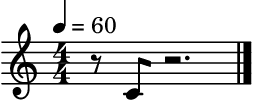

Chain([4C~:0.5♩, 4C:0.5♩, 4D:0.5♩, 4E:1♩:offset=3])
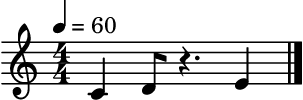

In [6]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3"
])
ch.dump()

ev = ch.eventAt(0.5, split=True)
ch.removeRedundantOffsets()
ch.dump()
ev.show()
ch

In [7]:
assert all(item.parent is ch for item in ch.items)

4E:0.95♩
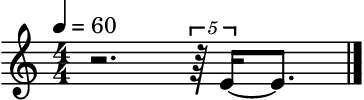

In [8]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3"
])

ev = ch.eventAt(3.05, split=True)
ev

Chain([4C:1♩, 4D:0.5♩, 4E:1♩:offset=3, Chain([4C:1♩, 4D:0.5♩])])
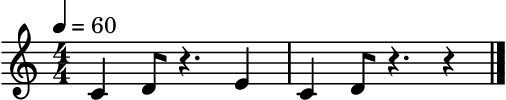

In [9]:
ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch

Chain([4C:1♩:offset=0, 4D:0.5♩:offset=1, 4E:1♩:offset=3, Chain([4C:1♩:offset=0, 4D:0.5♩:offset=1], offset=4)])
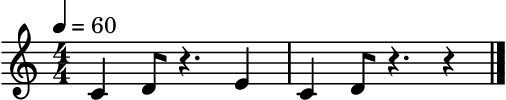

In [10]:
ch2 = ch.copy()
ch2.stack()
ch2.dump()
ch2


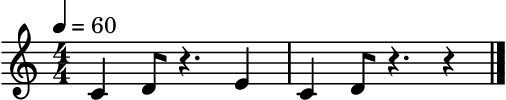

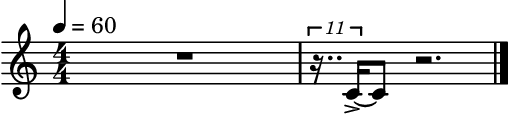

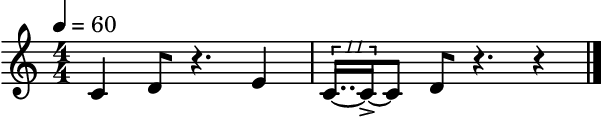

In [11]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch.show()

ch2 = ch.copy()
ev = ch2.eventAt((1, 0.32), split=True)
ev.addSymbol('accent')
ev.show()
ch2.show()

#ch2.dump()
#ev.show()
#ch2.show()

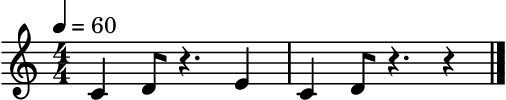

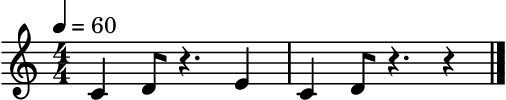

In [12]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch.show()

ch2 = ch.copy()
ch2.splitAt(3.5)
ch2.show()
ch2.dump()


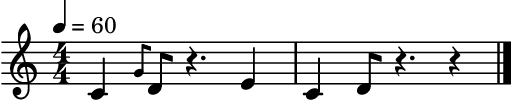

In [13]:
from maelzel.core import *

ch = Chain([
    "4C:1",
    "4G:0", 
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch.show()


In [14]:
ch.eventsBetween(3, 5)

[4E:1♩:offset=3, 4C:1♩]

In [15]:
ch.itemsBetween(3, 5)

[4E:1♩:offset=3, Chain([4C:1♩, 4D:0.5♩])]

Chain([4E:1♩, Chain([4C:1♩])], offset=3)
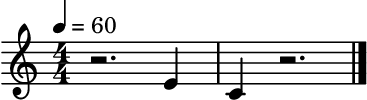

In [16]:
ch2 = ch.cropped(3, 5)
ch2.dump()
ch2

Chain([4E:1♩, Chain([4C:1♩])], offset=3)
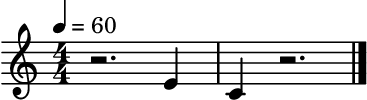

In [17]:
ch3 = ch2.copy()
ch3.absorbInitialOffset()
ch3.dump()
ch3

Chain([4E:1♩:offset=3, Chain([4C:1♩])])
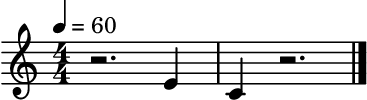

In [18]:
ch3.cropped(0, 10)

The events returned by eventsBetween are the actual events of the chain. Their offset is due to their position within the chain. Outside of it they, if they do not have an explicit offset they lose this absolute position

4C:1♩ 4
4D:0.5♩ 5


Chain([4C:1♩, 4D:0.5♩])
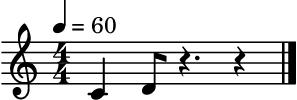

In [19]:
events = ch.eventsBetween(4, 6)
for ev in events:
    print(ev, ev.absOffset())
Chain(events)

To prevent this it is necessary to set the explicit offsets, either by flattening the chain or by calling eventsWithOffset

Chain([4C:1♩:offset=4, 4D:0.5♩:offset=5])
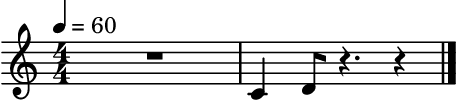

In [20]:
ch = Chain([
    "4C:1",
    "4G:0", 
    "4D:0.5",
    "4E:1:offset=3",
    Chain([
        "4C:1",
        "4D:0.5",
    ])
])
ch2 = ch.flat()
Chain(ch2.eventsBetween(4, 6))

Chain([4C:1♩:offset=4, 4D:0.5♩:offset=5])
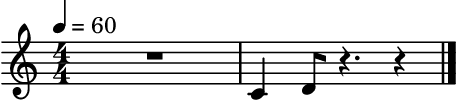

In [21]:
events = [ev.clone(offset=offset) for ev, offset in ch.eventsWithOffset(4, 6)]
Chain(events)


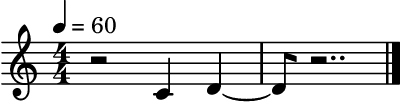

start=2, end=4


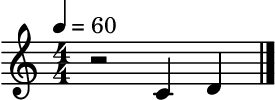

start=3, end=4


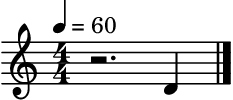

start=3.5, end=8


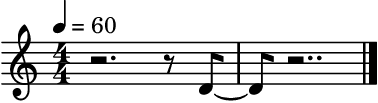

start=6, end=8


In [22]:
from maelzel.core import *

ch = Chain([
    "4C:1:offset=2",
    "4D:1.5",
])
ch.dump()
ch.show()
for start, end in [(2, 4), (3, 4), (3.5, 8), (6, 8)]:
    print(f"{start=}, {end=}")    
    ch2 = ch.cropped(start, end)
    if ch2 is not None:
        ch2.dump()
        ch2.show()


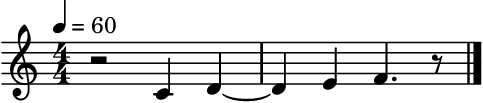

start=1, end=4


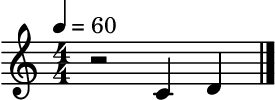

start=3, end=4


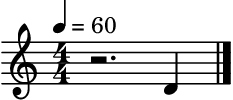

start=3.5, end=8


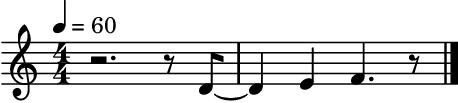

start=4.25, end=7


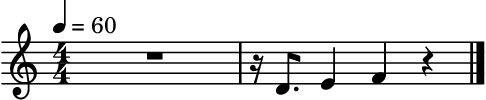

In [23]:
from maelzel.core import *

ch = Chain([
    "4C:1:offset=2",
    "4D:2",
    Chain([
        "4E:1",
        "4F:1.5"
    ])
])
ch.dump()
ch.show()
for start, end in [(1, 4), (3, 4), (3.5, 8), (4.25, 7)]:
    print(f"{start=}, {end=}")    
    ch2 = ch.cropped(start, end)
    if ch2 is not None:
        ch2.dump()
        ch2.show()


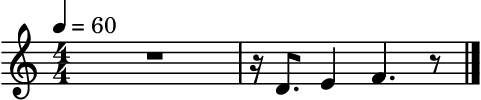

In [24]:
from maelzel.core import *
ch = Chain([
    "4C:1:offset=2",
    "4D:2",
    Chain([
        "4E",
        "4F:1.5"
    ])
])
ch2 = ch.cropped(4.25, 8)
v = ch2.flat().asVoice()
v.dump()
v.show()

In [25]:
%timeit ch2.flat().asVoice()

101 µs ± 965 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [5]:
%prun a = [ch2.flat().asVoice() for _ in range(1000)]

         276004 function calls in 0.341 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2000    0.074    0.000    0.074    0.000 {built-in method itertools.tee}
     3000    0.028    0.000    0.066    0.000 chain.py:132(__init__)
     6000    0.018    0.000    0.049    0.000 event.py:362(copy)
     9000    0.017    0.000    0.038    0.000 event.py:119(__init__)
    41000    0.016    0.000    0.034    0.000 {built-in method builtins.isinstance}
     3000    0.015    0.000    0.028    0.000 chain.py:39(_stackEvents)
     3000    0.014    0.000    0.032    0.000 event.py:371(clone)
     9000    0.012    0.000    0.020    0.000 eventbase.py:26(__init__)
     2000    0.012    0.000    0.106    0.000 chain.py:2266(_resolveGlissandi)
     1000    0.012    0.000    0.066    0.000 chain.py:386(flat)
    12000    0.011    0.000    0.011    0.000 mobj.py:125(__init__)
     1000    0.011    0.000    0.016    0.000 chain.py:72(_rem